In [524]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 显示中文设置...
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一(替换sans-serif字体)
plt.rcParams['axes.unicode_minus'] = False # 步骤二(解决坐标轴负数的负号显示问题)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [525]:
df=pd.read_csv('./data/iris.csv',header=None)
df

,0,1,2,3,4
0,150.0,4.0,setosa,versicolor,virginica
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2


In [526]:
col_name =   ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'] # 对特征和标签进行命名
df.columns = col_name
df=df.drop(index=0,inplace=False) # 去除第一行的数据信息描述
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


### 选取两个字段进行数据描述

In [527]:
iris=df.copy() # 复制数据 
iris2=df.copy()
# plt.figure(figsize=(10,6))
# sns.scatterplot(data=iris,x='sepal_length',y='sepal_width')

In [528]:
iris.species.unique()
for i in iris.columns:
    iris[i]=iris[i].astype(float)

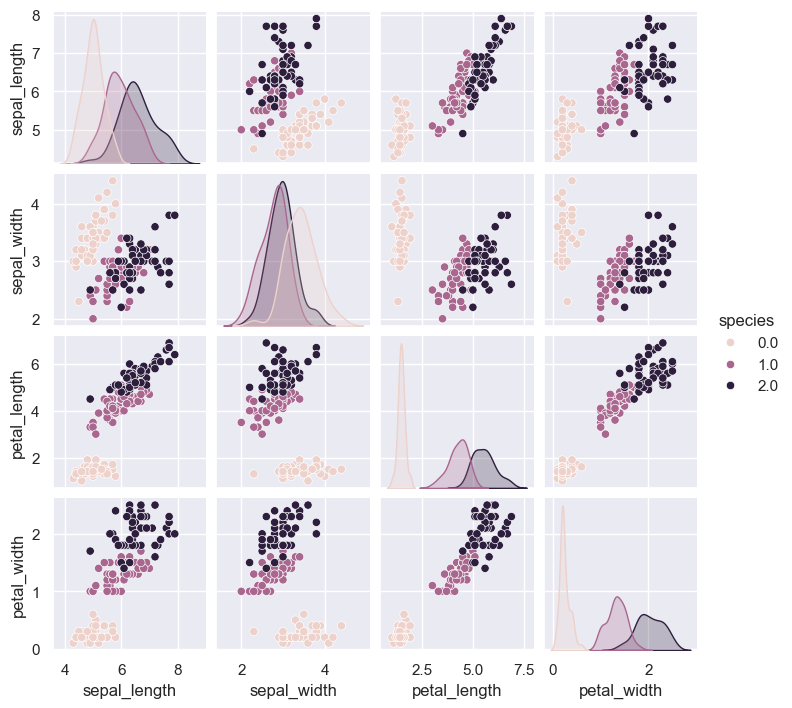

In [529]:
sns.pairplot(iris,hue='species',size=1.8)
plt.show()

In [530]:
print(iris.groupby('species').size())

species
0.0    50
1.0    50
2.0    50
dtype: int64


### 提取特征和标签

In [531]:
X=iris.iloc[:,:-1].values
y=iris.iloc[:,-1].values
X.shape,y.shape

((150, 4), (150,))

In [532]:
y=y.astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 切分训练集、测试集

In [533]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_train,y_test=y_train.reshape((-1,1)),y_test.reshape((-1,1))
X_train.shape,y_test.shape

((120, 4), (30, 1))

In [534]:
model=LogisticRegression()
# 用训练集训练模型
model.fit(X_train,y_train)
# 用测试集评估模型
model.score(X_test,y_test)
# 预测
y_pred=model.predict(X_test)

### 绘制混淆矩阵

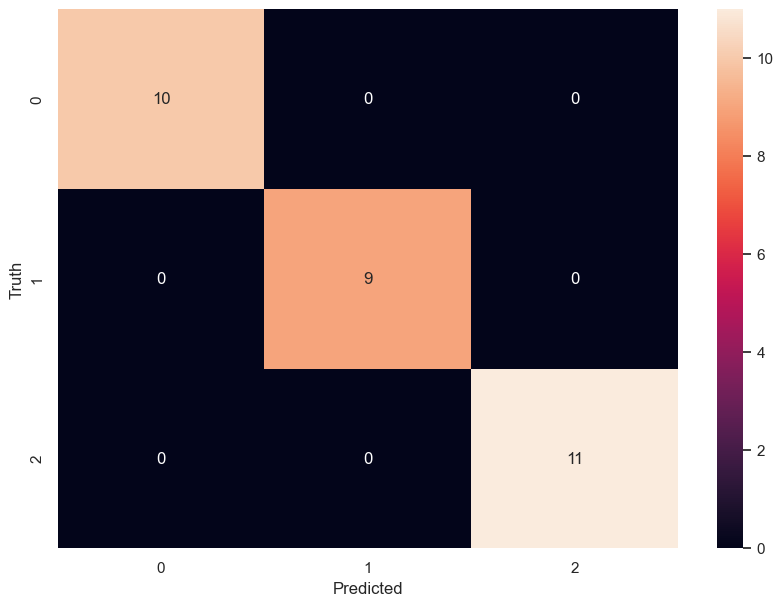

In [535]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [536]:
model.score(X_test,y_test)

1.0

In [537]:
# 去掉第3类结果 
iris2=iris2.iloc[:100,:]
iris2

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
96,5.7,3.0,4.2,1.2,1
97,5.7,2.9,4.2,1.3,1
98,6.2,2.9,4.3,1.3,1
99,5.1,2.5,3.0,1.1,1


In [538]:
#数据切分
features2 = iris2.iloc[:, :2].values
labels2 = iris2.iloc[:, -1].values
labels2=labels2.astype(int)
#模型初始化
model2 = LogisticRegression()
#模型训练
model2.fit(features2,labels2)
#模型评估
model2.score(features2,labels2)



1.0

### 绘制决策边界

In [539]:
x_min,x_max=features2[:,0].min()-0.5,features2[:,0].max()+0.5
y_min,y_max=features2[:,1].min()-0.5,features2[:,1].max()+0.5 #获取标签字段中的最小值和最大值，加减0.5是为了绘制画布扩大点的距离
x_min,x_max

(3.8, 7.5)

In [540]:
y_min,y_max

(1.5, 4.9)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

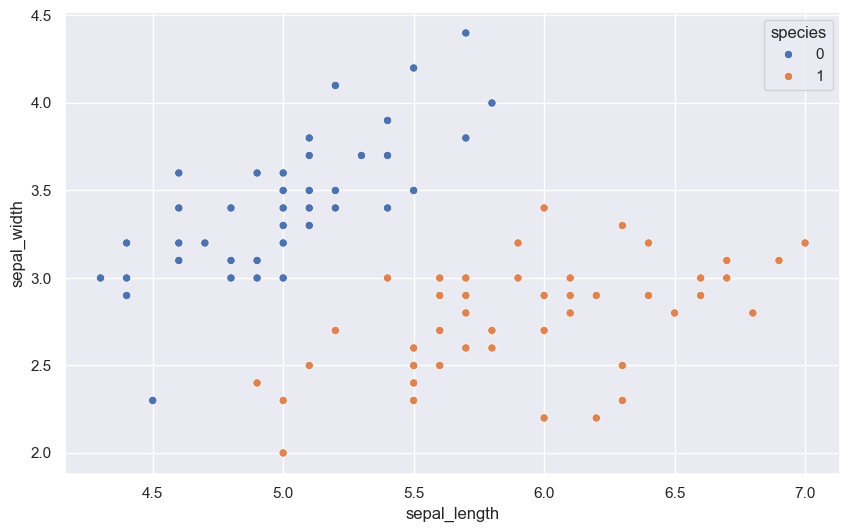

In [541]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=iris2,x='sepal_length',y='sepal_width',hue='species')

### 绘制棋盘

In [542]:
h=0.02
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
xx.shape,yy.shape

((171, 185), (171, 185))

In [543]:
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel方法用于展平数组，np.c_用于拼接数组，将两个特征组成一个矩阵

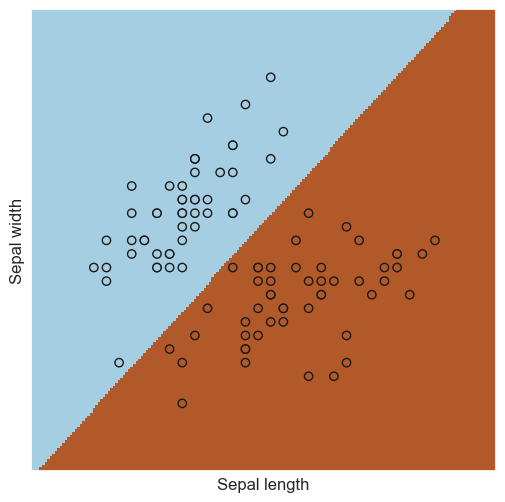

In [544]:
Z=Z.reshape(xx.shape) # 转换成棋盘的形状
plt.figure(1,figsize=(6,6))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
plt.scatter(features2[:, 0], features2[:, 1], c=labels2, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(()) 
plt.show()

### 多分类决策边界

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

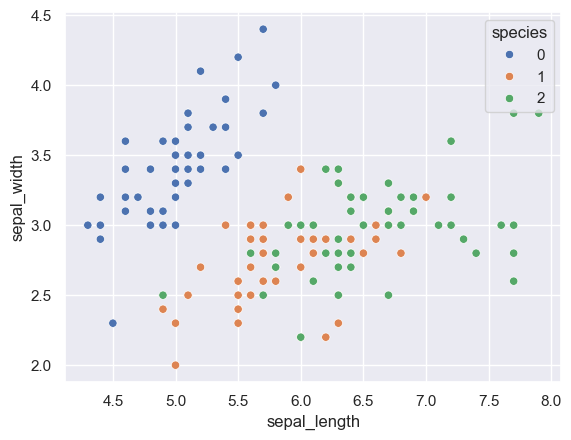

In [545]:
iris3=df.copy() 
sns.scatterplot(data=iris3, x="sepal_length", y="sepal_width",hue='species')

In [546]:
features3=iris3.iloc[:,:2].values
label3=iris3.iloc[:,-1].values
label3=label3.astype(int)
model3=LogisticRegression()
model3.fit(features3,label3)
model3.score(features3,label3)

0.82

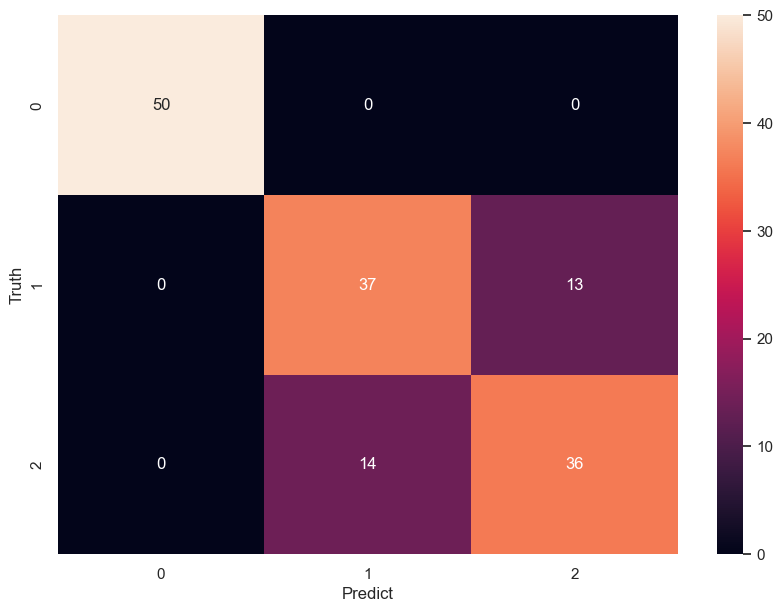

In [547]:
y_pred=model3.predict(features3)
cm=confusion_matrix(label3,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')
plt.show()

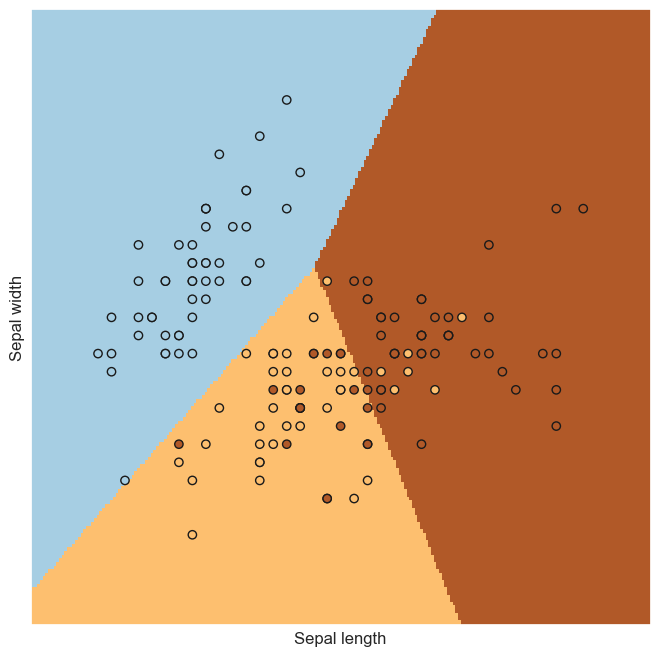

In [548]:
#指定x和y轴取值范围
x_min, x_max = features3[:, 0].min() - 0.5, features3[:, 0].max() + 0.5
y_min, y_max = features3[:, 1].min() - 0.5, features3[:, 1].max() + 0.5
#绘制棋盘
h = 0.02  
plt.figure(figsize=(8,8))
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#对棋盘中的每一个交点进行分类预测
Z = model3.predict(np.c_[xx.ravel(), yy.ravel()]) 
#把预测的结果展现在二维图像上，绘制决策边界
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
#添加原始数据
plt.scatter(features3[:, 0], features3[:, 1], c=label3, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
#坐标刻度和取值范围设置
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
#显示图像
plt.show()


In [549]:
label3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 三维决策边界

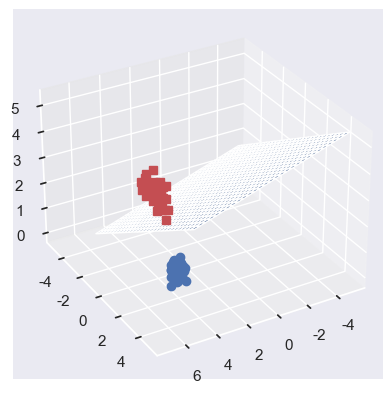

In [550]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first three features.
Y = iris.target

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = LogisticRegression()
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()
